In [32]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and Processing


In [64]:
#car_dataset = pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")
car_dataset = pd.read_csv("/content/car data.csv")

In [65]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [66]:
car_dataset.shape

(301, 9)

In [67]:
#getting some information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [68]:
#checking the number of missing value
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [69]:
#checking the distribution of categorical data
#print(car_dataset.fuel.value_counts())
#print(car_dataset.seller_type.value_counts())
#print(car_dataset.transmission.value_counts())
#print(car_dataset.owner.value_counts())


#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Owner.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


Encoding the Categorical Data

In [70]:
# # encoding 'fuel' column
# car_dataset.replace({'fuel':{ 'Petrol':0,'Diesel':1, 'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# # encoding 'seller_type' column
# car_dataset.replace({'seller_type':{ 'Dealer':0,'Individual':1, 'Trustmark Dealer':2}},inplace=True)

# # encoding 'transmission' column
# car_dataset.replace({'transmission':{ 'Manual':0,'Automatic':1}},inplace=True)

# #encoding 'owner' column
# car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)



# encoding 'fuel' column
car_dataset.replace({'Fuel_Type':{ 'Petrol':0,'Diesel':1, 'CNG':2}},inplace=True)

# encoding 'seller_type' column
car_dataset.replace({'Seller_Type':{ 'Dealer':0,'Individual':1}},inplace=True)

# encoding 'transmission' column
car_dataset.replace({'Transmission':{ 'Manual':0,'Automatic':1}},inplace=True)





In [71]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Train_test_split by splitting the data

In [73]:
x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [74]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [75]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [77]:
# #splitting the training and testing data
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


#splitting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

Model Training


1.Linear regression



In [78]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [79]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [80]:
#prediction on Training data
training_data_prediction=lin_reg_model.predict(x_train)

In [81]:
# R squared Error
error_score= metrics.r2_score(y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8799451660493711


Visualize the actual prize and Predicted prices

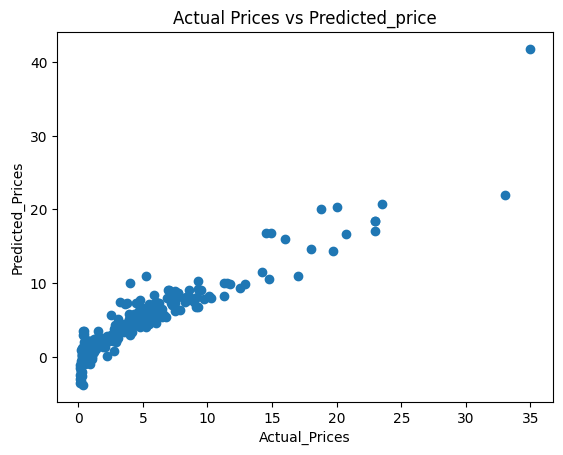

In [82]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual_Prices")
plt.ylabel("Predicted_Prices")
plt.title("Actual Prices vs Predicted_price")
plt.show()

In [83]:
#prediction on Testing data
testing_data_prediction=lin_reg_model.predict(x_test)

In [84]:
# R squared Error
error_score= metrics.r2_score(y_test,testing_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8365766715027051


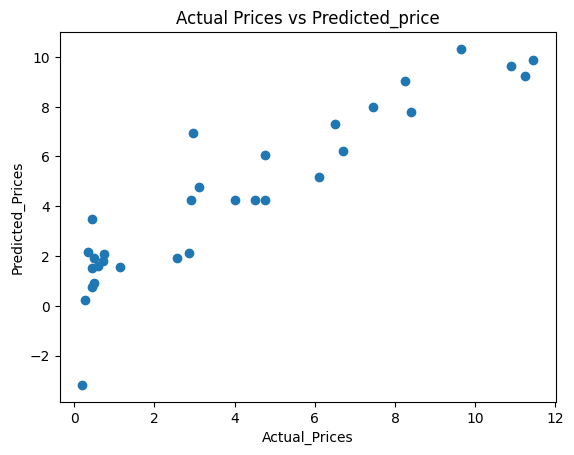

In [85]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual_Prices")
plt.ylabel("Predicted_Prices")
plt.title("Actual Prices vs Predicted_price")
plt.show()

2.Lasso Regression

In [86]:
#loading the linear regression model
lass_reg_model=Lasso()

In [87]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [88]:
#prediction on Training data
training_data_prediction=lass_reg_model.predict(x_train)

In [89]:
# R squared Error
error_score= metrics.r2_score(y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8427856123435794


Visualize the actual prize and Predicted prices

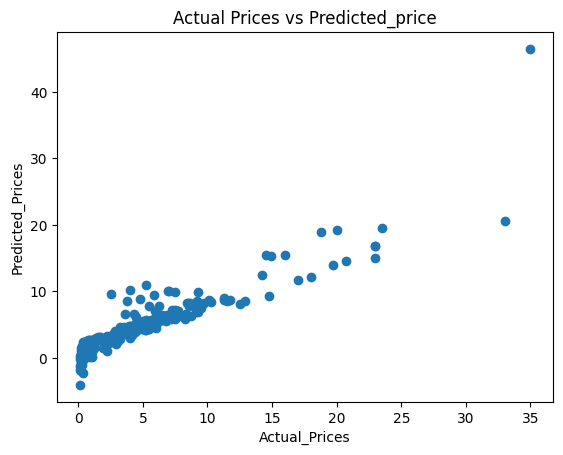

In [90]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual_Prices")
plt.ylabel("Predicted_Prices")
plt.title("Actual Prices vs Predicted_price")
plt.show()

In [91]:
#prediction on Testing data
testing_data_prediction=lass_reg_model.predict(x_test)

In [92]:
# R squared Error
error_score= metrics.r2_score(y_test,testing_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8709167941173195


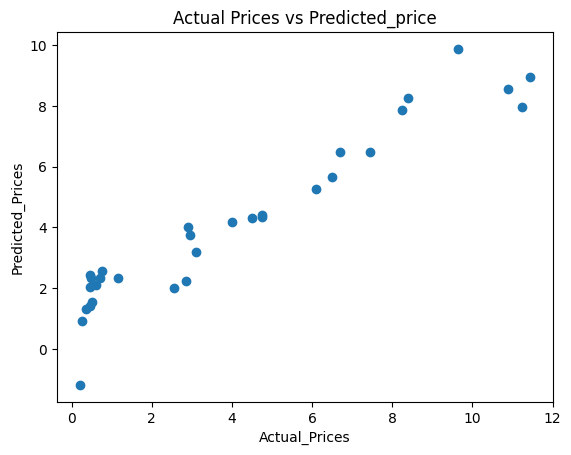

In [93]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual_Prices")
plt.ylabel("Predicted_Prices")
plt.title("Actual Prices vs Predicted_price")
plt.show()